# Linear Regression with Tennis Player Stats

We want to show simple linear regression using tennis player stats. Why am I doing this? 2 reason? First, Tennis happens to be my favorite topic. and second, I've wanted to see if I can make the simplest TF model using tensor flow from pure baisc building blocks. In theory in can optimimise any "function" that can be represented as a computational graph.  

So first things to do is load up the tennis data 

In [35]:
import pandas as pd

In [36]:
def get_tennis_data_as_pandas():
    tennis_df = pd.read_csv("tennis_players.txt", sep='\t');
    return tennis_df
    

In [37]:
tennis_df = get_tennis_data_as_pandas()
tennis_df


,Rk,Player,M,DR,Points,TPW%,TBs,TB W-L,TB W%,TB/S,Sets,Set W-L,S W%,Gms,Game W-L,G W%,Time/Mt,Min/Set,Sec/Pt
0,1,Rafael Nadal [ESP],78,1.43,11530,55.7%,23,15-8,65.2%,11.4%,201,162-39,80.6%,1303,860-443,66.0%,1:52,43.5,45.5
1,2,Roger Federer [SUI],57,1.42,9385,54.9%,30,21-9,70.0%,19.4%,155,125-30,80.6%,1107,690-417,62.3%,1:38,36.0,35.7
2,3,Grigor Dimitrov [BUL],68,1.20,10934,53.0%,27,17-10,63.0%,15.1%,179,121-58,67.6%,1472,831-641,56.5%,1:48,40.9,40.1
3,4,Alexander Zverev [GER],77,1.11,12164,52.0%,33,19-14,57.6%,16.6%,199,131-68,65.8%,1689,927-762,54.9%,1:41,39.2,38.5
4,5,Dominic Thiem [AUT],74,1.12,11926,51.8%,28,14-14,50.0%,14.5%,193,123-70,63.7%,1418,788-630,55.6%,1:46,40.7,39.5
5,6,Marin Cilic [CRO],64,1.23,10425,53.0%,30,16-14,53.3%,17.5%,171,109-62,63.7%,1196,674-522,56.4%,1:50,41.1,40.4
6,7,David Goffin [BEL],79,1.13,12367,52.1%,35,20-15,57.1%,17.3%,202,127-75,62.9%,1696,925-771,54.5%,1:43,40.3,39.5
7,8,Jack Sock [USA],59,1.04,10060,50.4%,32,22-10,68.8%,20.1%,159,92-67,57.9%,1385,702-683,50.7%,1:50,40.8,38.7
8,9,Stanislas Wawrinka [SUI],37,1.08,6438,51.5%,20,14-6,70.0%,19.2%,104,67-37,64.4%,765,417-348,54.5%,1:56,41.3,40.0
9,10,Pablo Carreno Busta [ESP],62,1.03,10118,50.8%,26,18-8,69.2%,15.6%,167,97-70,58.1%,1224,642-582,52.5%,1:48,40.0,39.6


now perhaps a simple regression. wait what do we want  to predict!??
We could predict the result of a match up. Well matchups won't really work as we don't have data showing matchups and their results?? Perhaps something to look at later.
We'll attempt something more simple.

Regression allows us to predict given a set a of values the results of a situation given that we know. 
So perhaps what we can predict a player rankings rather?



What features do we have available to us?

In [38]:
tennis_df.columns.values



array(['Rk', 'Player', 'M', 'DR', 'Points', 'TPW%', 'TBs', 'TB W-L',
       'TB W%', 'TB/S', 'Sets', 'Set W-L', 'S W%', 'Gms', 'Game W-L',
       'G W%', 'Time/Mt', 'Min/Set', 'Sec/Pt'], dtype=object)

So quite a bit, so what we want to do now  is try to see if we can predict rankings by looking solely at win rate and see what the rankings looks  like afterwards

In [39]:
import tensorflow as tf

# lets first  divy up the data, with 40 data points to train and 10 points to predict on

# so take columns for win rate ("G W%")
data = tennis_df.loc[:,("Rk", "G W%")]
#pd.to_numeric(data["G W%"], errors='coerce')

data["G W%"] = data["G W%"].str.strip('%')
data["G W%"] = pd.to_numeric(data["G W%"], errors='coerce')
data.shape

(50, 2)

In [40]:
import numpy as np
# then now partition in train and test

train_indicies = np.arange(data.shape[0])
np.random.shuffle(train_indicies)
train_indicies

array([26, 10, 34, 39, 41, 27, 36,  8, 22, 23, 35, 45, 14, 11,  4, 24,  1,
        3, 15, 28, 31, 43, 29, 38,  9, 16, 19,  6, 33, 42, 17, 18,  5, 44,
       40, 47, 13, 25, 49,  7, 32, 20, 30,  2, 37,  0, 21, 12, 48, 46])

In [94]:
train = data.values[train_indicies[:40]]
test = data.values[train_indicies[40:]]

print(train.shape)
print(test.shape)

np.array([0,train[1][1]])

train.shape[0]


(40, 2)
(10, 2)


40

So how do we make a linear regression model. We could use the tensor flow Estimator module which does all this for us. But lets get a bit hardcore and use first princples

In [166]:
# clear old variables
tf.reset_default_graph()

with tf.name_scope('model'):
    # is  our feature vector with only 1 feature !
    X = tf.placeholder(tf.float32, [None, 1])
    W1 = tf.get_variable("W1", [1])
    #W1 = tf.constant([-0.138]) 
    b1 = tf.get_variable("b1", [1])
    #b1 = tf.constant([32.3])
y_out = X * W1 + b1

# this is the input place holder
y = tf.placeholder(tf.float32, [None, 1])

# now for the losses 

n_samples = train.shape[0] +0.0
total_loss = tf.losses.mean_squared_error(labels=y,predictions=y_out)
cost = tf.reduce_sum(tf.pow(y-y_out, 2))/(2*n_samples)
mean_loss = tf.reduce_mean(total_loss)

# define our optimizer
#optimizer = tf.train.GradientDescentOptimizer(0.00001) # select optimizer and set learning rate
optimizer = tf.train.AdamOptimizer(100e-1) # select optimizer and set learning rate
train_step = optimizer.minimize(mean_loss)


So that's the model done, that was complicated, in terms that I needed to figure out how to set up the shapes of the matrix correctly and seem like tf doesn't allow rank 1 tensors for matmul (i.e. 1x1 matrix, scalars) 

In [170]:
with tf.Session() as sess:
    w_param = 0
    b_param = 0
    try:
        sess.run(tf.global_variables_initializer())
        
        for i in range(400):
            _, loss = sess.run([train_step, mean_loss], { X: train[:,1].reshape(train.shape[0], 1),
                         y:  train[:,0].reshape(train.shape[0], 1)})
            
            if i % 50 == 0:
                w = sess.run(W1)
                b = sess.run(b1)
                print("loss: ", loss)
                #print(y_out)
                print("w: ", w)
                print("b: ", b)
            
        w_param = sess.run(W1)
        b_param = sess.run(b1)
    except Exception as e:
        print("error: ", e)

    print("Final values, intercept: {0}, Slope: {1}".format( b_param, w_param ))

loss:  1220.15
w:  [-8.96623325]
b:  [-8.76391411]
loss:  224.325
w:  [ 0.04003569]
b:  [ 1.74846506]
loss:  223.39
w:  [ 0.42783618]
b:  [ 4.6813221]
loss:  215.715
w:  [ 0.31548396]
b:  [ 7.8369956]
loss:  211.371
w:  [ 0.24869473]
b:  [ 11.60214615]
loss:  206.643
w:  [ 0.17009503]
b:  [ 15.81489468]
loss:  201.639
w:  [ 0.08437646]
b:  [ 20.4001503]
loss:  196.465
w:  [-0.00710603]
b:  [ 25.29318237]
Final values, intercept: [ 30.33267021], Slope: [-0.10132835]


Well, that was fun!  So essentially it gave me an intercept of28 and slow of -0.06. So does this make any sense.  Well the only way to find out is to plot it. 

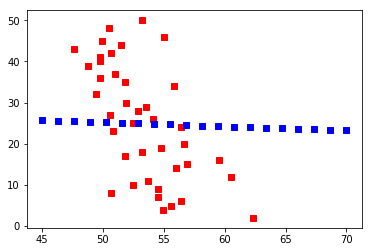

In [171]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(train[:,1], train[:,0], 'xr', marker="s", label='train')

# create lin space  between 50 and 65
X_data = np.linspace(45, 70, 20)

Y_data = X_data * w_param + b_param

ax1.plot(X_data, Y_data, 'xb', marker="s", label='train')


Well..... Its not the worst plot Actually it is. This makes me think while the equation is headed in the right direction, something is not quite right

So lets try  again  building the model. This time I've taken some hints on variable contstruction from here:
https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/linear_regression.py

Sucks to have to look up someone else's code, but hey ho, standing on the "shoulder of giants" and all that



In [176]:


# clear old variables
tf.reset_default_graph()

with tf.name_scope('model'):
    # is  our feature vector with only 1 feature !
    X = tf.placeholder(tf.float32)
    W1 = tf.Variable(rng.randn(), name="weight")
    #W1 = tf.constant([-0.138]) 
    b1 = tf.Variable(rng.randn(), name="intercept")
    #b1 = tf.constant([32.3])
#y_out = X * W1 + b1

y_out = tf.add(tf.multiply(X, W1), b1)

# this is the input place holder
y = tf.placeholder(tf.float32)

# now for the losses 

n_samples = train.shape[0]
cost = tf.reduce_sum(tf.pow(y-y_out, 2))/(2*n_samples)

# define our optimizer
#optimizer = tf.train.GradientDescentOptimizer(0.0001) # select optimizer and set learning rate
optimizer = tf.train.AdamOptimizer(1000e-1) # select optimizer and set learning rate
train_step = optimizer.minimize(cost)


In [178]:
with tf.Session() as sess:
    w_param = 0
    b_param = 0
    try:
        sess.run(tf.global_variables_initializer())
        
        for i in range(400):
            _, loss = sess.run([train_step, cost], { X: train[:,1].reshape(train.shape[0], 1),
                         y:  train[:,0].reshape(train.shape[0], 1)})
            
            if i % 50 == 0:
                w = sess.run(W1)
                b = sess.run(b1)
                print("loss: ", loss)
                #print(y_out)
                print("w: ", w)
                print("b: ", b)
            
        w_param = sess.run(W1)
        b_param = sess.run(b1)
    except Exception as e:
        print("error: ", e)

    print("Final values, intercept: {0}, Slope: {1}".format( b_param, w_param ))

loss:  2092.76
w:  99.255
b:  101.692
loss:  33067.8
w:  -0.513969
b:  3.32742
loss:  428.592
w:  0.487863
b:  6.70616
loss:  108.125
w:  0.247692
b:  9.52088
loss:  104.846
w:  0.218426
b:  13.0778
loss:  102.648
w:  0.147616
b:  17.0285
loss:  100.317
w:  0.0669682
b:  21.3319
loss:  97.8976
w:  -0.0190563
b:  25.9323
Final values, intercept: 30.679336547851562, Slope: -0.10780978947877884


So now lets see how this performs by plotting the data

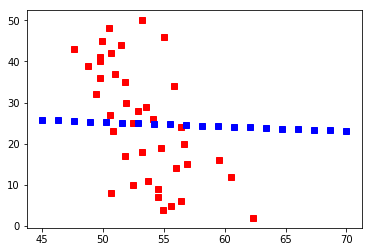

In [179]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(train[:,1], train[:,0], 'xr', marker="s", label='train')

# create lin space  between 50 and 65
X_data = np.linspace(45, 70, 20)

Y_data = X_data * w_param + b_param

ax1.plot(X_data, Y_data, 'xb', marker="s", label='train')

Oh no, the  same result! Well turns out, I actually did nothing wrong. The main problem was my epoch length. It wasn't anywhere near enough. 

# Old model, higher epoch count

In [183]:
# clear old variables
tf.reset_default_graph()

with tf.name_scope('model'):
    # is  our feature vector with only 1 feature !
    X = tf.placeholder(tf.float32, [None, 1])
    W1 = tf.get_variable("W1", [1])
    #W1 = tf.constant([-0.138]) 
    b1 = tf.get_variable("b1", [1])
    #b1 = tf.constant([32.3])
y_out = X * W1 + b1

# this is the input place holder
y = tf.placeholder(tf.float32, [None, 1])

# now for the losses 

n_samples = train.shape[0] +0.0
total_loss = tf.losses.mean_squared_error(labels=y,predictions=y_out)
cost = tf.reduce_sum(tf.pow(y-y_out, 2))/(2*n_samples)
mean_loss = tf.reduce_mean(total_loss)

# define our optimizer
#optimizer = tf.train.GradientDescentOptimizer(0.00001) # select optimizer and set learning rate
optimizer = tf.train.AdamOptimizer(100e-1) # select optimizer and set learning rate
train_step = optimizer.minimize(mean_loss)

losses = list()

with tf.Session() as sess:
    w_param = 0
    b_param = 0
    try:
        sess.run(tf.global_variables_initializer())
        
        for i in range(4000):
            _, loss = sess.run([train_step, cost], { X: train[:,1].reshape(train.shape[0], 1),
                         y:  train[:,0].reshape(train.shape[0], 1)})
            losses.append(loss)
            
            if i % 400 == 0:
                w = sess.run(W1)
                b = sess.run(b1)
                print("loss: ", loss)
                #print(y_out)
                print("w: ", w)
                print("b: ", b)
            
        w_param = sess.run(W1)
        b_param = sess.run(b1)
    except Exception as e:
        print("error: ", e)

    print("Final values, intercept: {0}, Slope: {1}".format( b_param, w_param ))

loss:  509.453
w:  [ 9.90895844]
b:  [ 11.51272106]
loss:  95.1395
w:  [-0.12067758]
b:  [ 31.36756134]
loss:  76.5816
w:  [-0.95069212]
b:  [ 75.76099396]
loss:  65.9067
w:  [-1.70412755]
b:  [ 116.05856323]
loss:  61.9431
w:  [-2.22994518]
b:  [ 144.18199158]
loss:  64.4582
w:  [-2.54448223]
b:  [ 159.31616211]
loss:  60.859
w:  [-2.62297845]
b:  [ 165.25695801]
loss:  60.8333
w:  [-2.66647267]
b:  [ 167.53170776]
loss:  60.8302
w:  [-2.68274665]
b:  [ 168.40003967]
loss:  60.8298
w:  [-2.68882918]
b:  [ 168.72579956]
Final values, intercept: [ 169.02510071], Slope: [-2.51698279]


So we have a  different value  for intercept and slope, let plot it again

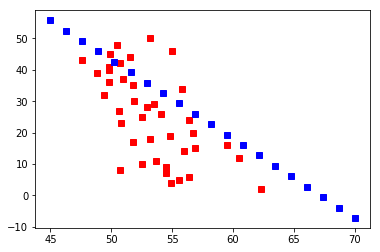

In [184]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(train[:,1], train[:,0], 'xr', marker="s", label='train')

# create lin space  between 50 and 65
X_data = np.linspace(45, 70, 20)

Y_data = X_data * w_param + b_param

ax1.plot(X_data, Y_data, 'xb', marker="s", label='train')

Much better results! I think what I can take from this, is always plot the loss value with epoch count to see whether it is converging. 

(-100, 800)

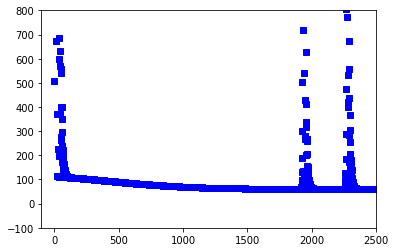

In [195]:
fig = plt.figure()
ax1 = fig.add_subplot(111)



ax1.plot(losses, 'xb', marker="s", label='train')
plt.xlim(-100, 2500)
plt.ylim(-100, 800)

It is obvious thart at the previous 400 mark the algorithm was still making progress and I cut it off way too early